In [2]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import train_test_split, GridSearchCV 
%matplotlib inline

# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

Do sentiment extraction

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
data1 = pd.read_csv('test.csv', index_col=False)
data2 = pd.read_csv('train.csv', index_col=False)

df_all = data2.append(data1,ignore_index=True)
df0 = df_all[df_all["Stance"] == "unrelated"]
df0["Stance"] = 0
df1 = df_all[df_all["Stance"] == "agree"]
df1["Stance"] = 1
df2 = df_all[df_all["Stance"] == "disagree"]
df2["Stance"] = 0
df3 = df_all[df_all["Stance"] == "discuss"]
df3["Stance"] = 1
df_all = df0.append(df1,ignore_index=True)
df_all = df_all.append(df2,ignore_index=True)
data = df_all.append(df3,ignore_index=True)

In [9]:
data.head()

Headline  Body ID  Stance  \
0     Soldier shot near Canadian parliament building        0       0   
1  Caught a catfish record in Po: 127 kg and 2.67...        0       0   
2  Enormous 20-stone catfish caught with fishing ...        0       0   
3             Soldier shot at war memorial in Canada        0       0   
4  A soldier has been shot at Canada’s war memori...        0       0   

                                                Body  
0  A small meteorite crashed into a wooded area i...  
1  A small meteorite crashed into a wooded area i...  
2  A small meteorite crashed into a wooded area i...  
3  A small meteorite crashed into a wooded area i...  
4  A small meteorite crashed into a wooded area i...

In [10]:
del data['Body ID']

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiment = DataFrame(columns=('Positive', 'Negative', 'Neutral'))
sentiment2 = DataFrame(columns=('Positive', 'Negative', 'Neutral'))
counter = 0
for article in data['Body']:
    article_compound = 0
    article_neg = 0
    article_pos = 0
    article_neu = 0
    counter = counter + 1
    try:
        sentences = sent_tokenize(article.decode('utf-8'))
        l = len(sentences)
    except:
        sentences = ['test', 'test2 jh']
        l = 1000000000000
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        article_compound = article_compound + vs['compound']
        article_neg = article_neg + vs['neg']
        article_pos = article_pos + vs['pos']
        article_neu = article_neu + vs['neu']
    article_sentiment = DataFrame([[article_pos/l, article_neg/l, article_neu/l, article_compound/l]], columns=('Body_Positive', 'Body_Negative', 'Body_Neutral', 'Body_Compound'))
    sentiment = sentiment.append(article_sentiment, ignore_index = True)
for article in data['Headline']:
    article_compound = 0
    article_neg = 0
    article_pos = 0
    article_neu = 0
    counter = counter + 1
    try:
        sentences = sent_tokenize(article.decode('utf-8'))
        l = len(sentences)
    except:
        print(counter)
        sentences = ['test', 'test2 jh']
        l = 1000000000000
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        article_compound = article_compound + vs['compound']
        article_neg = article_neg + vs['neg']
        article_pos = article_pos + vs['pos']
        article_neu = article_neu + vs['neu']
    article_sentiment = DataFrame([[article_pos/l, article_neg/l, article_neu/l, article_compound/l]], columns=('Head_Positive', 'Head_Negative', 'Head_Neutral', 'Head_Compound'))
    sentiment2 = sentiment2.append(article_sentiment, ignore_index = True)

75386
75387
75388
75389
75390
75391
75392
75393
75394
75395
75396
75397
75398
75399
75400
75401
75402
75403
75404
75405
75406
75407
75408
75409
75410
75411
75412
75413
75414
75415
75416
75417
75418
75419
75420
75421
75422
75423
75424
75425
75426
75427
75428
75429
75430
75431
75432
75433
75434
75435
75436
75437
75438
75439
75440
75441
75442
75443
75444
75445
75446
75447
75448
75449
75450
75451
75452
75453
75454
75455
75456
75457
75458
75459
75460
75461
75462
75463
75464
75465
75466
75467
75468
75469
75470
75471
75472
75473
75474
75475
75476
75477
75478
75479
75480
75481
75482
75483
75484
75485
75486
75487
75488
75489
75490
75491
75492
75493
75494
75495
75496
75497
75498
75499
75500
75501
75502
75503
75504
75505
75506
75507
75508
75509
75510
75511
75512
75513
75514
75515
75516
75517
75518
75519
75520
75521
75522
75523
75524
75525
75526
75527
75528
75529
75530
75531
75532
75533
75534
75535
75536
75537
75538
75539
75540
75541
75542
75543
75544
75545
75546
75547
75548
75549
75550
75551
7555

In [13]:
sentiment.describe()

Body_Positive  Body_Negative  Body_Neutral  Body_Compound
count        75385.0        75385.0  7.538500e+04        75385.0
mean             0.0            0.0  2.000000e-12            0.0
std              0.0            0.0  0.000000e+00            0.0
min              0.0            0.0  2.000000e-12            0.0
25%              0.0            0.0  2.000000e-12            0.0
50%              0.0            0.0  2.000000e-12            0.0
75%              0.0            0.0  2.000000e-12            0.0
max              0.0            0.0  2.000000e-12            0.0

In [14]:
sentiment2.describe()

Head_Positive  Head_Negative  Head_Neutral  Head_Compound
count        75385.0        75385.0  7.538500e+04        75385.0
mean             0.0            0.0  2.000000e-12            0.0
std              0.0            0.0  0.000000e+00            0.0
min              0.0            0.0  2.000000e-12            0.0
25%              0.0            0.0  2.000000e-12            0.0
50%              0.0            0.0  2.000000e-12            0.0
75%              0.0            0.0  2.000000e-12            0.0
max              0.0            0.0  2.000000e-12            0.0

In [15]:
df = pd.concat([data, sentiment,sentiment2], axis=1)
del df['Positive']
del df['Neutral']
del df['Negative']

In [16]:
df.head()

Headline  Stance  \
0     Soldier shot near Canadian parliament building       0   
1  Caught a catfish record in Po: 127 kg and 2.67...       0   
2  Enormous 20-stone catfish caught with fishing ...       0   
3             Soldier shot at war memorial in Canada       0   
4  A soldier has been shot at Canada’s war memori...       0   

                                                Body  Body_Positive  \
0  A small meteorite crashed into a wooded area i...            0.0   
1  A small meteorite crashed into a wooded area i...            0.0   
2  A small meteorite crashed into a wooded area i...            0.0   
3  A small meteorite crashed into a wooded area i...            0.0   
4  A small meteorite crashed into a wooded area i...            0.0   

   Body_Negative  Body_Neutral  Body_Compound  Head_Positive  Head_Negative  \
0            0.0  2.000000e-12            0.0            0.0            0.0   
1            0.0  2.000000e-12            0.0            0.0            0.0   
2            0.0  2.000000e-12            0.0            0.0            0.0   
3            0.0  2.000000e-12            0.0            0.0            0.0   
4            0.0  2.000000e-12            0.0            0.0            0.0   

   Head_Neutral  Head_Compound  
0  2.000000e-12            0.0  
1  2.000000e-12            0.0  
2  2.000000e-12            0.0  
3  2.000000e-12            0.0  
4  2.000000e-12            0.0

In [17]:
del df["Body"]
del df["Headline"]
df

Stance  Body_Positive  Body_Negative  Body_Neutral  Body_Compound  \
0           0            0.0            0.0  2.000000e-12            0.0   
1           0            0.0            0.0  2.000000e-12            0.0   
2           0            0.0            0.0  2.000000e-12            0.0   
3           0            0.0            0.0  2.000000e-12            0.0   
4           0            0.0            0.0  2.000000e-12            0.0   
...       ...            ...            ...           ...            ...   
75380       1            0.0            0.0  2.000000e-12            0.0   
75381       1            0.0            0.0  2.000000e-12            0.0   
75382       1            0.0            0.0  2.000000e-12            0.0   
75383       1            0.0            0.0  2.000000e-12            0.0   
75384       1            0.0            0.0  2.000000e-12            0.0   

       Head_Positive  Head_Negative  Head_Neutral  Head_Compound  
0                0.0            0.0  2.000000e-12            0.0  
1                0.0            0.0  2.000000e-12            0.0  
2                0.0            0.0  2.000000e-12            0.0  
3                0.0            0.0  2.000000e-12            0.0  
4                0.0            0.0  2.000000e-12            0.0  
...              ...            ...           ...            ...  
75380            0.0            0.0  2.000000e-12            0.0  
75381            0.0            0.0  2.000000e-12            0.0  
75382            0.0            0.0  2.000000e-12            0.0  
75383            0.0            0.0  2.000000e-12            0.0  
75384            0.0            0.0  2.000000e-12            0.0  

[75385 rows x 9 columns]

Modeling for classification

In [18]:
# split training and testing data and apply scaling
X_features = df.loc[:,['Body_Compound','Body_Negative','Body_Neutral','Body_Positive','Head_Negative','Head_Neutral','Head_Positive','Head_Compound']]
Y_targetClass = df.Stance
X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_targetClass,random_state=1000)
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

LogisticRegression

In [19]:
model= LogisticRegression()
fitted_model=model.fit(X_train,Y_train)
fitted_model.score(X_test,Y_test)

0.7514723828726058

LDA

In [20]:
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train, Y_train)
fitted_model.score(X_test,Y_test)

0.7514723828726058

QDA

In [21]:
QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
fitted_model.score(X_test,Y_test)

0.7514723828726058

KNN

[0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058, 0.7514723828726058]


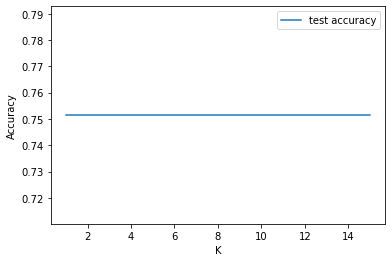

In [22]:
test_accuracy=[ ]
neighbor_setting =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for N_neighbor in neighbor_setting:
    knn=KNeighborsClassifier(n_neighbors=N_neighbor)
    knn.fit(X_train, Y_train)
    test_accuracy.append(knn.score(X_test,Y_test))
plt.plot(neighbor_setting,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()
print (test_accuracy)
plt.legend()
plt.show()

SVM

In [23]:
svmModel=SVC(kernel='rbf', gamma=0.2, C=0.1)
fitted_model=svmModel.fit(X_train,Y_train)
fitted_model.score(X_test,Y_test)

0.7514723828726058

In [24]:
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set
best_score = 0
kflods = 5
for c in [0.001, 0.1, 1, 10, 1000]:
    for g in [0.001, 0.1, 1, 10, 1000]:
        svmModel=SVC(kernel='rbf', gamma=g, C=c)
        scores = cross_val_score(svmModel,X_train_transformed,Y_train,cv = kflods)
        score = np.mean(scores)
        if(score > best_score):
            best_score = score
            best_C = c
            best_gamma = g
SelectedSvmModel = SVC(kernel='rbf', gamma=best_gamma, C=best_C).fit(X_train_transformed,Y_train)
test_score = SelectedSvmModel.score(X_test_transformed,Y_test)
print("Best score on validation set is: ",best_score)
print("Best parameters: C=",best_C,"gamma = ",best_gamma)
print("Test set socre with best parameters is",test_score)

KeyboardInterrupt: 

Tree Model

In [ ]:
treeModel = DecisionTreeClassifier(random_state=0,max_depth=2,criterion='gini')
FittedTreeModel = treeModel.fit(X_train,Y_train)
FittedTreeModel.score(X_test,Y_test)

0.6552801093109506

RandomForest

In [ ]:
forestModel=RandomForestClassifier (n_estimators=4, max_features=2, max_depth=2, random_state=0)
FittedTreeModel = forestModel.fit(X_train,Y_train)
FittedTreeModel.score(X_test,Y_test)

0.6552801093109506

AdaBoost

In [ ]:
BoostModel= AdaBoostClassifier(n_estimators=4, random_state=0)
fittedModel = BoostModel.fit(X_train,Y_train)
fittedModel.score(X_test,Y_test)

0.65996486433730239

Multi-layer neural network

In [ ]:
# 8 - input
# 10 - hidden1
# 5 - hidden2
# 4 - output
MLPmodel=MLPClassifier(solver='sgd', activation='relu', random_state=0, hidden_layer_sizes=[10,5], alpha=0.5)
fittedModel = MLPmodel.fit(X_train_transformed,Y_train)
fittedModel.score(X_test_transformed,Y_test)

0.65586570368924457

In [ ]:
MLPmodel=MLPClassifier(solver='lbfgs', activation='relu', random_state=10, hidden_layer_sizes=[10,5], alpha=0.5)
fittedModel = MLPmodel.fit(X_train_transformed,Y_train)
fittedModel.score(X_test_transformed,Y_test)

0.66367362873316416

Lightgbm

In [ ]:
# create dataset for lightgbm
lb = preprocessing.LabelBinarizer()
y_train=lb.fit_transform(Y_train)
y_test=lb.fit_transform(Y_test)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# specify your configurations as a dict
params = {  
    'task': 'train',  
    'boosting_type': 'gbdt',  
    'objective': 'multiclass',  
    'num_class': 4,  
    'verbose': 0,  
    'metric': 'multi_logloss',  
    'max_bin': 255,  
    'max_depth': 7,  
    'learning_rate': 0.3,  
    'nthread': 4,  
    'n_estimators': 85,  
    #'feature_fraction': 0.8  
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Start predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print(y_pred)
print('The roc of prediction is:', roc_auc_score(Y_test, y_pred) )

Start training...
[1]	valid_0's multi_logloss: 0.953598
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 0.885204
[3]	valid_0's multi_logloss: 0.839755
[4]	valid_0's multi_logloss: 0.805824
[5]	valid_0's multi_logloss: 0.781958
[6]	valid_0's multi_logloss: 0.763962
[7]	valid_0's multi_logloss: 0.749428
[8]	valid_0's multi_logloss: 0.738609
[9]	valid_0's multi_logloss: 0.729418
[10]	valid_0's multi_logloss: 0.72051
[11]	valid_0's multi_logloss: 0.714514
[12]	valid_0's multi_logloss: 0.706203
[13]	valid_0's multi_logloss: 0.702917
[14]	valid_0's multi_logloss: 0.695947
[15]	valid_0's multi_logloss: 0.691024
[16]	valid_0's multi_logloss: 0.687012
[17]	valid_0's multi_logloss: 0.681688
[18]	valid_0's multi_logloss: 0.679339
[19]	valid_0's multi_logloss: 0.677746
[20]	valid_0's multi_logloss: 0.673441
Start predicting...
[[  2.81833604e-16   1.84565310e-01   4.34067226e-02   7.72027968e-01]
 [  3.64578363e-16   3.80814295e-01   1.82640397e-01   4.365